In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from operator import add
#import seaborn as sns
import glob as glob

In [22]:
n=50
def get_bo_data(n=50,string="bo_L*"): 
 flag=0
 for file in glob.glob(string):
    print('file is:',file)
    placeholder= pd.read_csv(file, delimiter="\t", dtype=np.float32)
    placeholder['min']=placeholder.Y.expanding(1).min()
    placeholder=placeholder.head(n)
    _place_= placeholder['min']
    _place_= np.array(_place_)
    minY=_place_.min();
    #print(minY)
    if placeholder['min'].shape[0]<=n:
        shorten=n-placeholder['min'].shape[0]
        _place_= np.pad(_place_,(0,shorten),'constant', constant_values=(minY))       
    if flag==0:
       datalcb=_place_.reshape(1,-1);flag=1;
    else: 
       datalcb=np.concatenate((datalcb, _place_.reshape(1,-1)),axis=0)  
 print(datalcb.shape)
 return datalcb
data_lcb= get_bo_data(n,"bo_L*")
data_ei= get_bo_data(n,"bo_E*")
print('data lcb shape:',data_lcb.shape,'data ei shape:',data_ei.shape)

file is: bo_LCB2
file is: bo_LCB4
file is: bo_LCB1
file is: bo_LCB3
file is: bo_LCB6
(5, 50)
file is: bo_EI2
file is: bo_EI4
file is: bo_EI1
file is: bo_EI3
file is: bo_EI6
(5, 50)
data lcb shape: (5, 50) data ei shape: (5, 50)


In [23]:
def get_pymoo_data(n=50,string="pymoo_G*"): 
 flag=0
 for file in glob.glob(string):
    print('file is:',file)
    placeholder= pd.read_csv(file, delimiter=",",names=list('abntY'), header=None)
    #print(placeholder)
    placeholder['min']=placeholder.Y.expanding(1).min()
    placeholder=placeholder.head(n)
    _place_= placeholder['min']
    _place_= np.array(_place_)
    minY=_place_.min();
    #print(minY)
    if placeholder['min'].shape[0]<=n:
        shorten=n-placeholder['min'].shape[0]
        _place_= np.pad(_place_,(0,shorten),'constant', constant_values=(minY))       
    if flag==0:
       datalcb=_place_.reshape(1,-1);flag=1;
    else: 
       datalcb=np.concatenate((datalcb, _place_.reshape(1,-1)),axis=0)  
 print(datalcb.shape)
 return datalcb
data_ga= get_pymoo_data(n,"pymoo_G*")
data_nm= get_pymoo_data(n,"pymoo_N*")
data_lhc= get_pymoo_data(n,"doe_lhc*")
data_vmc= get_pymoo_data(n,"doe_vmc*")
print('data lcb shape:',data_lcb.shape,'data ei shape:',data_ei.shape)
print('data lhc shape:',data_lhc.shape,'data vmc shape:',data_vmc.shape)

file is: pymoo_GA1.csv
file is: pymoo_GA4.csv
file is: pymoo_GA3.csv
file is: pymoo_GA2.csv
(4, 50)
file is: pymoo_NM1.csv
file is: pymoo_NM2.csv
file is: pymoo_NM3.csv
(3, 50)
file is: doe_lhc1.csv
file is: doe_lhc5.csv
file is: doe_lhc4.csv
file is: doe_lhc2.csv
file is: doe_lhc3.csv
(5, 50)
file is: doe_vmc2.csv
file is: doe_vmc4.csv
file is: doe_vmc5.csv
file is: doe_vmc1.csv
file is: doe_vmc3.csv
(5, 50)
data lcb shape: (5, 50) data ei shape: (5, 50)
data lhc shape: (5, 50) data vmc shape: (5, 50)


In [24]:
data_lcb_m=np.mean(data_lcb, axis=0); print('data lcb shape:',data_lcb_m.shape)
data_ei_m=np.mean(data_ei, axis=0); print('data ei shape:',data_ei_m.shape)
data_ga_m=np.mean(data_ga, axis=0); print('data ga shape:',data_ga_m.shape)
data_nm_m=np.mean(data_nm, axis=0); print('data nm shape:',data_nm_m.shape)
data_lhc_m=np.mean(data_lhc, axis=0); print('data lhc shape:',data_lhc_m.shape)
data_vmc_m=np.mean(data_vmc, axis=0); print('data vmc shape:',data_vmc_m.shape)

print(data_lcb)

data lcb shape: (50,)
data ei shape: (50,)
data ga shape: (50,)
data nm shape: (50,)
data lhc shape: (50,)
data vmc shape: (50,)
[[ 6.53056097  6.53056097  5.74925613  5.74925613  5.74925613  5.74925613
   5.74925613  5.74925613  5.74925613  5.74925613  5.74925613  5.74925613
   5.58844662  5.58844662  5.58844662  5.58844662  5.58844662  5.58844662
   5.58844662  5.58844662  5.58844662  4.91879559  4.91879559  4.91879559
   4.91879559  4.91879559  4.91879559  4.91879559  4.91879559  4.91879559
   4.91879559  4.91879559  4.91879559  4.91879559  4.91879559  4.91879559
   4.91879559  4.91879559  4.91879559  4.91879559  4.91879559  4.91879559
   4.91879559  4.91879559  4.91879559  4.91879559  4.91879559  4.91879559
   4.91879559  4.91879559]
 [19.09836578  6.22871065  6.22871065  6.22871065  6.22871065  6.22871065
   6.22871065  6.22871065  6.22871065  4.91879559  4.91879559  4.91879559
   4.91879559  4.91879559  4.91879559  4.91879559  4.91879559  4.91879559
   4.91879559  4.91879559  4.9

In [25]:
index=np.arange(1,(n+1),dtype=int)
index

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

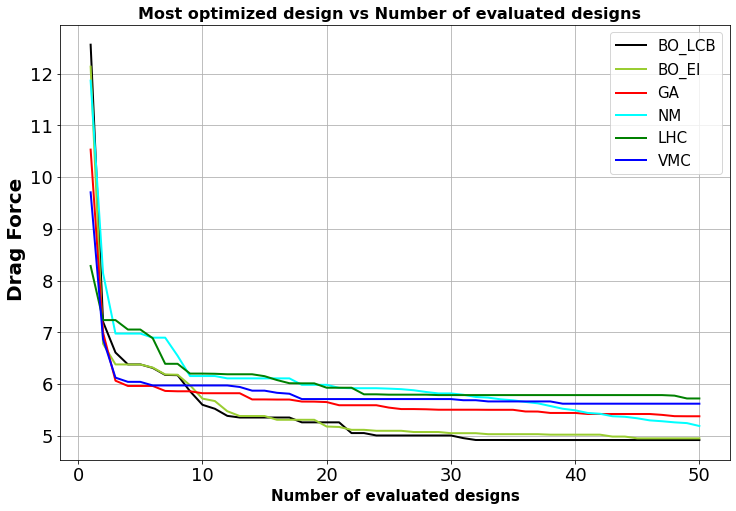

In [26]:
fig,ax=plt.subplots(figsize=(12,8))

plt.plot(index,data_lcb_m,c='black',label='BO_LCB',linewidth=2.0)
plt.plot(index,data_ei_m,c='yellowgreen',label='BO_EI',linewidth=2.0)
plt.plot(index,data_ga_m,c='red',label='GA',linewidth=2.0)
plt.plot(index,data_nm_m,c='cyan',label='NM',linewidth=2.0)
plt.plot(index,data_lhc_m,c='green',label='LHC',linewidth=2.0)
plt.plot(index,data_vmc_m,c='blue',label='VMC',linewidth=2.0)

plt.legend(loc='best',fontsize=15)
#plt.legend(loc="lower center", ncol=4,fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=18)
plt.title('Most optimized design vs Number of evaluated designs  ',fontsize=16, weight='bold')
#plt.hlines(max_uni,0,110,linestyles= 'dashed')
#plt.hlines(max_uni,6,25,linestyles= 'dashed')
#plt.vlines(6,0,max_uni,linestyles= 'dashed')
#plt.vlines(5.5,0,max_lhc,linestyles= 'dashed')
#plt.xticks(np.arange(0, 25+1, 1.0))
#plt.xlim(0,26)
#plt.ylim(0,85)
#plt.xticks(np.arange(0, 94, 1))
#plt.yticks(np.arange(0,10.0,0.1))
#plt.xlim(0,26)
#plt.ylim(5,8)
plt.xlabel('Number of evaluated designs',fontsize=15,weight='bold')
plt.ylabel(' Drag Force',fontsize=20,weight='bold')
plt.grid()
plt.show()
#fig.savefig('../fig/comparison_result1.png')

In [24]:
"""
#define values
values = [1100, 2200]

#drop rows that contain any value in the list
boei_data = boei_data[boei_data.Y.isin(values) == False]
bolcb_data = bolcb_data[bolcb_data.Y.isin(values) == False]

ga_data = ga_data[ga_data.Y.isin(values) == False]
lhcminimax_data = lhcminimax_data[lhcminimax_data.Y.isin(values) == False]

vmc_data = vmc_data[vmc_data.Y.isin(values) == False]
nm_data = nm_data[nm_data.Y.isin(values) == False]
"""

'\n#define values\nvalues = [1100, 2200]\n\n#drop rows that contain any value in the list\nboei_data = boei_data[boei_data.Y.isin(values) == False]\nbolcb_data = bolcb_data[bolcb_data.Y.isin(values) == False]\n\nga_data = ga_data[ga_data.Y.isin(values) == False]\nlhcminimax_data = lhcminimax_data[lhcminimax_data.Y.isin(values) == False]\n\nvmc_data = vmc_data[vmc_data.Y.isin(values) == False]\nnm_data = nm_data[nm_data.Y.isin(values) == False]\n'

In [21]:
lhcminimax_data.loc[lhcminimax_data['Y'].idxmin()]

a        545.656791
b        234.818213
c        549.524996
d        191.000000
n          1.506551
t         14.462271
V      22156.138583
Y          5.379029
min        5.379029
Name: 93, dtype: float64